# Import the libraries and dataset

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import time

import plotly.express as ply
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

In [3]:
import plotly.io as pio
pio.templates.default = 'plotly_dark'

In [4]:
bank = pd.read_csv('bankruptcy-prevention.csv', sep=';')
bank.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


# Exploratory data analysis 

So we have import dataset, now let's take a look.

the first is getting infomation about dataset

**We will check the following points for data validation**:
1. NaN values
2. Typing errors
3. Duplicate values
4. Mixed datatype
5. Membership constraint (like blood group can't be D+)
6. Regular expression patterns (like mobile number have 10 digits (in india))
7. Cross field validation (like admission data come before discharge)
8. Empty cell or row or column.

After following the steps given above,it results in clean and uniform dataset.

**Now we can explore and visualize the following things:**
1. Distribution of data.
2. outliers detection and replacement if necessary.
3. Use Boxplot, Density plot, Histogram to get more detail regarding **concentration, distribution,
skewness, outliers, range etc** of data.
4. Check the Correlation between the variables.
5. **Use scatterplot and PCA method** with 'hue' to get insides, regarding the decision boundary in case of **classification problem**.
6. We can use K-mean clustering method to get some more insides for selection of model in classification case.
7. Perform the remaining Univariate, Multi-variate analysis with graphical and non-graphical method.

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


> Looks like there is a problem in the names of the columns. there is a **space** at starting of the name of columns, so we need to correct it first.

> So there is no null values and the columns data is in same type (float), so there is no chances for having null values in other format like in string or symbolic. (eg, '?', 'don't know' etc)

In [6]:
colm = []
for col in bank.columns:
    print(col)
    col=col.strip()
    colm.append(col)
 
bank.columns = colm
bank.head(2)

industrial_risk
 management_risk
 financial_flexibility
 credibility
 competitiveness
 operating_risk
 class


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [7]:
bank.rename(columns= {'class': 'target_variable'}, inplace=True)

In [8]:
bank.tail(2)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


## Let's check for **NaN values**

In [9]:
bank.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
target_variable          0
dtype: int64

 We already know that, there are zero null values from info and also now from isnull() function

In [10]:
bank['industrial_risk'].value_counts()

1.0    89
0.5    81
0.0    80
Name: industrial_risk, dtype: int64

In [11]:
bank['target_variable'].value_counts()

non-bankruptcy    143
bankruptcy        107
Name: target_variable, dtype: int64

## Checking for duplicate values

In [12]:
df_bank = bank[bank.duplicated(keep=False)].sort_values(['target_variable', 'industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'operating_risk'])
df_bank.shape

(221, 7)

> In above DataFrame, we are keeping the all duplicate values (**without dropping first one**), so we get the DataFrame with 221 rows

> The following is with **dropping the first occurance.**

In [13]:
df_bank_remove = bank[bank.duplicated()].sort_values(['target_variable', 'industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'operating_risk'])
df_bank_remove.shape

(147, 7)

> The following rows are without having any duplicate values (**unique in DataFrame**)

In [14]:
bank_unique_records = bank.drop_duplicates(keep= False)
print(f'The shape of Unique records are {bank_unique_records.shape}')
bank_unique_records

The shape of Unique records are (29, 7)


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
27,0.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
36,1.0,1.0,0.0,1.0,0.0,0.0,bankruptcy
72,1.0,0.5,1.0,0.5,0.0,0.0,bankruptcy
142,0.0,1.0,1.0,1.0,0.5,1.0,non-bankruptcy
143,1.0,0.0,1.0,0.5,1.0,0.5,non-bankruptcy
144,0.5,1.0,0.5,1.0,1.0,0.5,non-bankruptcy
145,0.5,0.0,1.0,0.5,0.5,0.5,non-bankruptcy
146,0.5,0.5,0.5,1.0,0.5,0.0,non-bankruptcy
147,0.5,0.5,0.5,0.5,1.0,1.0,non-bankruptcy
148,1.0,0.5,1.0,1.0,1.0,1.0,non-bankruptcy


> And in above dataframe we removed (keeped as it is) the **First** duplicate values, which gives us 147 rows. Hence these are the rows we can **drop from original dataframe**.

> 🤯🔍 **Careful** The dataframe given below shows us the count of duplicate rows with their respective values.

In [15]:
# This DataFrame is without dropping first occurance 
pd.set_option('display.max_rows', None)
duplicate_without_remove = pd.DataFrame(df_bank.value_counts())
duplicate_without_remove

0
industrial_risk management_risk financial_flexibility credibility competitiveness operating_risk target_variable    
0.0             1.0             0.0                   0.0         0.0             1.0            bankruptcy       11
1.0             1.0             0.0                   0.0         0.0             1.0            bankruptcy       10
                                                                                  0.5            bankruptcy        9
0.5             1.0             0.0                   0.0         0.0             1.0            bankruptcy        8
                0.5             0.0                   0.0         0.0             1.0            bankruptcy        7
                1.0             0.0                   0.0         0.0             0.5            bankruptcy        5
0.0             0.5             0.0                   0.0         0.0             1.0            bankruptcy        5
1.0             1.0             0.0                   0.5         0.0             1.0            bankruptcy        4
0.5             0.0             0.0                   0.5         0.0             1.0            bankruptcy        4
1.0             0.5             0.0                   0.0         0.0             0.0            bankruptcy        4
                1.0             0.0                   0.0         0.0             0.0            bankruptcy        4
0.0             1.0             0.0                   0.0         0.5             0.5            bankruptcy        4
1.0             1.0             0.0                   0.5         0.0             0.5            bankruptcy        4
0.0             0.5             1.0                   0.0         1.0             1.0            non-bankruptcy    4
1.0             1.0             0.0                   0.5         0.0             0.0            bankruptcy        4
0.5             0.0             0.5                   1.0         0.5             0.0            non-bankruptcy    4
1.0             1.0             0.5                   0.0         0.0             1.0            bankruptcy        4
                                                      1.0         0.5             1.0            non-bankruptcy    4
                0.0             0.0                   0.0         0.0             1.0            bankruptcy        4
0.0             0.0             0.5                   1.0         1.0             0.0            non-bankruptcy    4
0.5             0.5             0.5                   1.0         1.0             0.5            non-bankruptcy    4
                0.0             0.0                   1.0         0.5             0.0            non-bankruptcy    4
                0.5             0.0                   1.0         1.0             0.0            non-bankruptcy    3
0.0             1.0             0.0                   0.0         0.0             0.0            bankruptcy        3
1.0             0.0             0.5                   0.5         0.5             1.0            non-bankruptcy    2
                                                                  1.0             1.0            non-bankruptcy    2
                                0.0                   1.0         1.0             0.5            non-bankruptcy    2
0.5             1.0             0.0                   1.0         1.0             0.5            non-bankruptcy    2
1.0             0.0             0.5                   1.0         0.5             0.0            non-bankruptcy    2
0.0             0.0             0.5                   0.5         0.5             0.0            non-bankruptcy    2
1.0             0.0             1.0                   1.0         1.0             1.0            non-bankruptcy    2
                0.5             0.0                   0.0         0.0             1.0            bankruptcy        2
0.5             0.5             1.0                   1.0         0.5             0.5            non-bankruptcy    2
1.0             1.0 

In [16]:
# This DataFrame is with dropping first occurance observation.
duplicate_with_remove = pd.DataFrame(df_bank_remove.value_counts())
duplicate_with_remove

0
industrial_risk management_risk financial_flexibility credibility competitiveness operating_risk target_variable    
0.0             1.0             0.0                   0.0         0.0             1.0            bankruptcy       10
1.0             1.0             0.0                   0.0         0.0             1.0            bankruptcy        9
                                                                                  0.5            bankruptcy        8
0.5             1.0             0.0                   0.0         0.0             1.0            bankruptcy        7
                0.5             0.0                   0.0         0.0             1.0            bankruptcy        6
                1.0             0.0                   0.0         0.0             0.5            bankruptcy        4
0.0             0.5             0.0                   0.0         0.0             1.0            bankruptcy        4
1.0             1.0             0.0                   0.5         0.0             1.0            bankruptcy        3
0.5             0.0             0.0                   0.5         0.0             1.0            bankruptcy        3
1.0             0.5             0.0                   0.0         0.0             0.0            bankruptcy        3
                1.0             0.0                   0.0         0.0             0.0            bankruptcy        3
0.0             1.0             0.0                   0.0         0.5             0.5            bankruptcy        3
1.0             1.0             0.0                   0.5         0.0             0.5            bankruptcy        3
0.0             0.5             1.0                   0.0         1.0             1.0            non-bankruptcy    3
1.0             1.0             0.0                   0.5         0.0             0.0            bankruptcy        3
0.5             0.0             0.5                   1.0         0.5             0.0            non-bankruptcy    3
1.0             1.0             0.5                   0.0         0.0             1.0            bankruptcy        3
                                                      1.0         0.5             1.0            non-bankruptcy    3
                0.0             0.0                   0.0         0.0             1.0            bankruptcy        3
0.0             0.0             0.5                   1.0         1.0             0.0            non-bankruptcy    3
0.5             0.5             0.5                   1.0         1.0             0.5            non-bankruptcy    3
                0.0             0.0                   1.0         0.5             0.0            non-bankruptcy    3
                0.5             0.0                   1.0         1.0             0.0            non-bankruptcy    2
0.0             1.0             0.0                   0.0         0.0             0.0            bankruptcy        2
1.0             0.0             0.5                   0.5         0.5             1.0            non-bankruptcy    1
                                                                  1.0             1.0            non-bankruptcy    1
                                0.0                   1.0         1.0             0.5            non-bankruptcy    1
0.5             1.0             0.0                   1.0         1.0             0.5            non-bankruptcy    1
1.0             0.0             0.5                   1.0         0.5             0.0            non-bankruptcy    1
0.0             0.0             0.5                   0.5         0.5             0.0            non-bankruptcy    1
1.0             0.0             1.0                   1.0         1.0             1.0            non-bankruptcy    1
                0.5             0.0                   0.0         0.0             1.0            bankruptcy        1
0.5             0.5             1.0                   1.0         0.5             0.5            non-bankruptcy    1
1.0             1.0 

In [17]:
duplicate_with_remove[0].sum()

147

> **🙄🙄147 duplicate rows**, let's check them out again.

In [18]:
bank[(bank.industrial_risk ==1) & (bank.management_risk == 1) & 
     (bank.financial_flexibility == 0) & (bank.credibility ==0) & (bank.operating_risk ==0.5)
    & (bank.target_variable == 'bankruptcy')]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
7,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy
24,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy
41,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy
51,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy
58,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy
64,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy
75,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy
84,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy
99,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy


In [19]:
bank[(bank.industrial_risk ==0.5) & (bank.management_risk == 1) & 
     (bank.financial_flexibility == 0) & (bank.credibility ==0) & (bank.operating_risk ==0.5)]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
15,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
16,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
50,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
92,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy


**😯😐 there are lots of duplicate row**, This rows will affect the model, so we need to delete them

In [20]:
bank_cleaned = bank.drop_duplicates().reset_index()
bank_cleaned.tail()

,index,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
98,185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy
99,187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy
100,190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy
101,192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy
102,194,0.0,1.0,0.5,0.0,0.5,0.0,non-bankruptcy


In [21]:
bank_cleaned.drop('index', axis = 1, inplace= True)

In [22]:
bank_cleaned.shape

(103, 7)

In [23]:
bank_cleaned.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
98,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy
99,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy
100,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy
101,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy
102,0.0,1.0,0.5,0.0,0.5,0.0,non-bankruptcy


So now the data is cleaned, we can apply the visualization method.

In [78]:
bank_final = bank.copy()

In [79]:
bank_final.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


## Visualization

Let's start visualization with following plots:
1. Box plot
2. Histogram
3. Countplot
4. Voilin plot
5. Scatterplot or pairplot
6. Density plot

<AxesSubplot:>

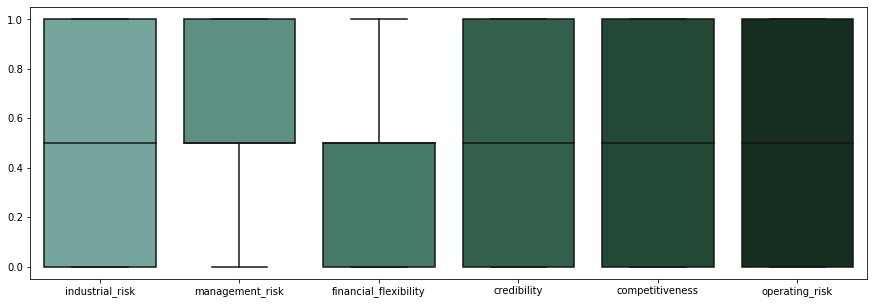

In [80]:
plt.figure(figsize=(15,5))
sn.boxplot(data = bank_final, palette=sn.color_palette("ch:2,r=.2,l=.6"))

In [81]:
ply.box(data_frame=bank_final.iloc[:,0:-1])

In [26]:
def countplots(data):
    plt.subplots(3,2, figsize = (15,25))
    i = 1
    for feature in data.columns:
        plt.subplot(4,2,i)
        sn.countplot(data = data, x = feature, hue='target_variable',)
        i+=1 

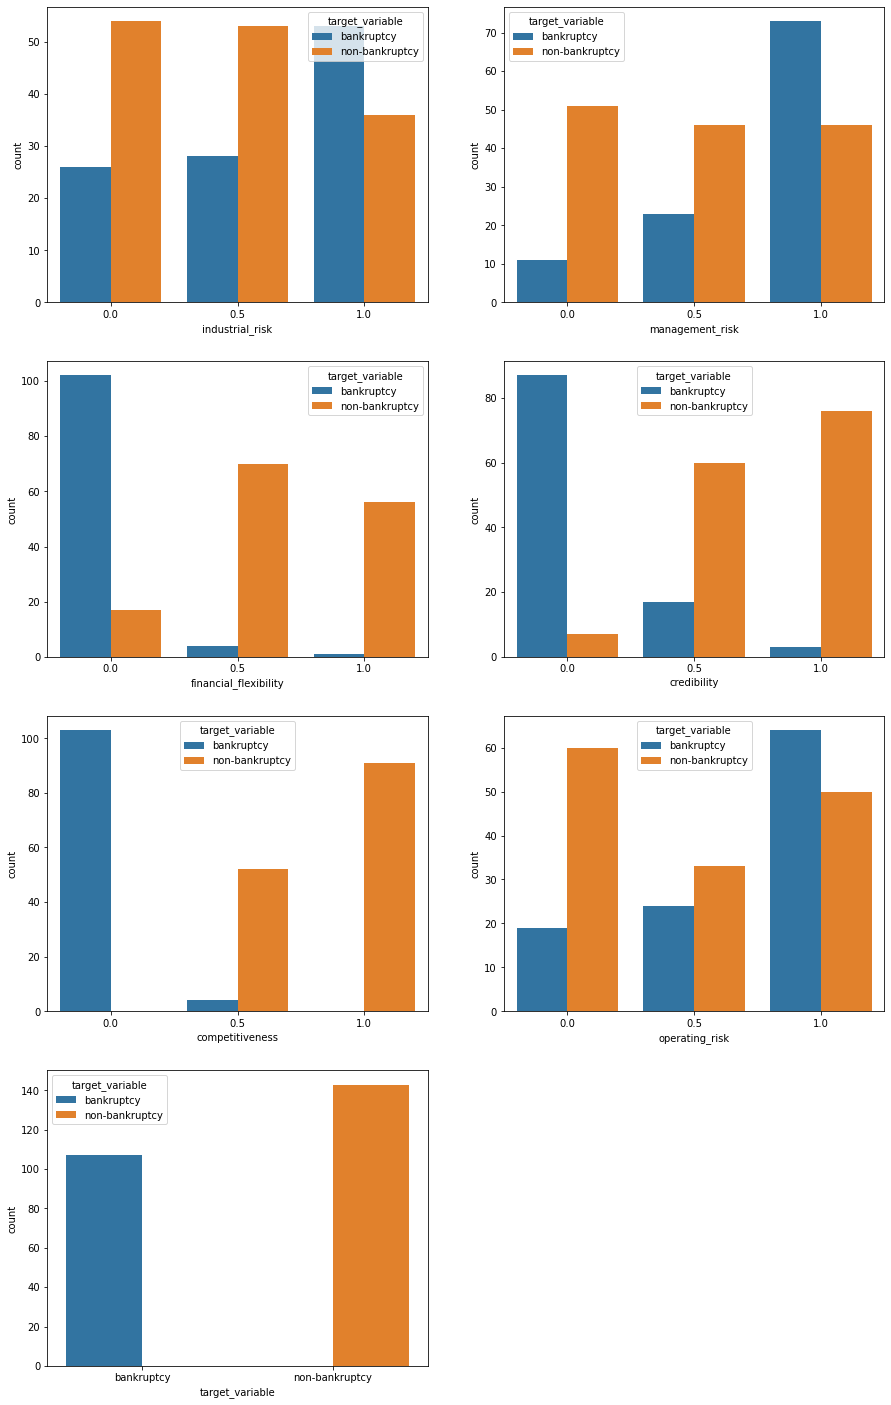

In [82]:
countplots(bank_final)

> 🏹 **Note:** we have unbalanced dataset.

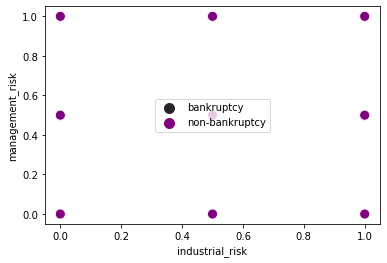

In [83]:
sn.scatterplot(data = bank_final, x = 'industrial_risk', y = 'management_risk', hue = 'target_variable', 
               size= 'target_variable', sizes=[100,100], palette=sn.dark_palette('purple', n_colors=2))
plt.legend(loc = 'center')

<Figure size 1440x3600 with 0 Axes>

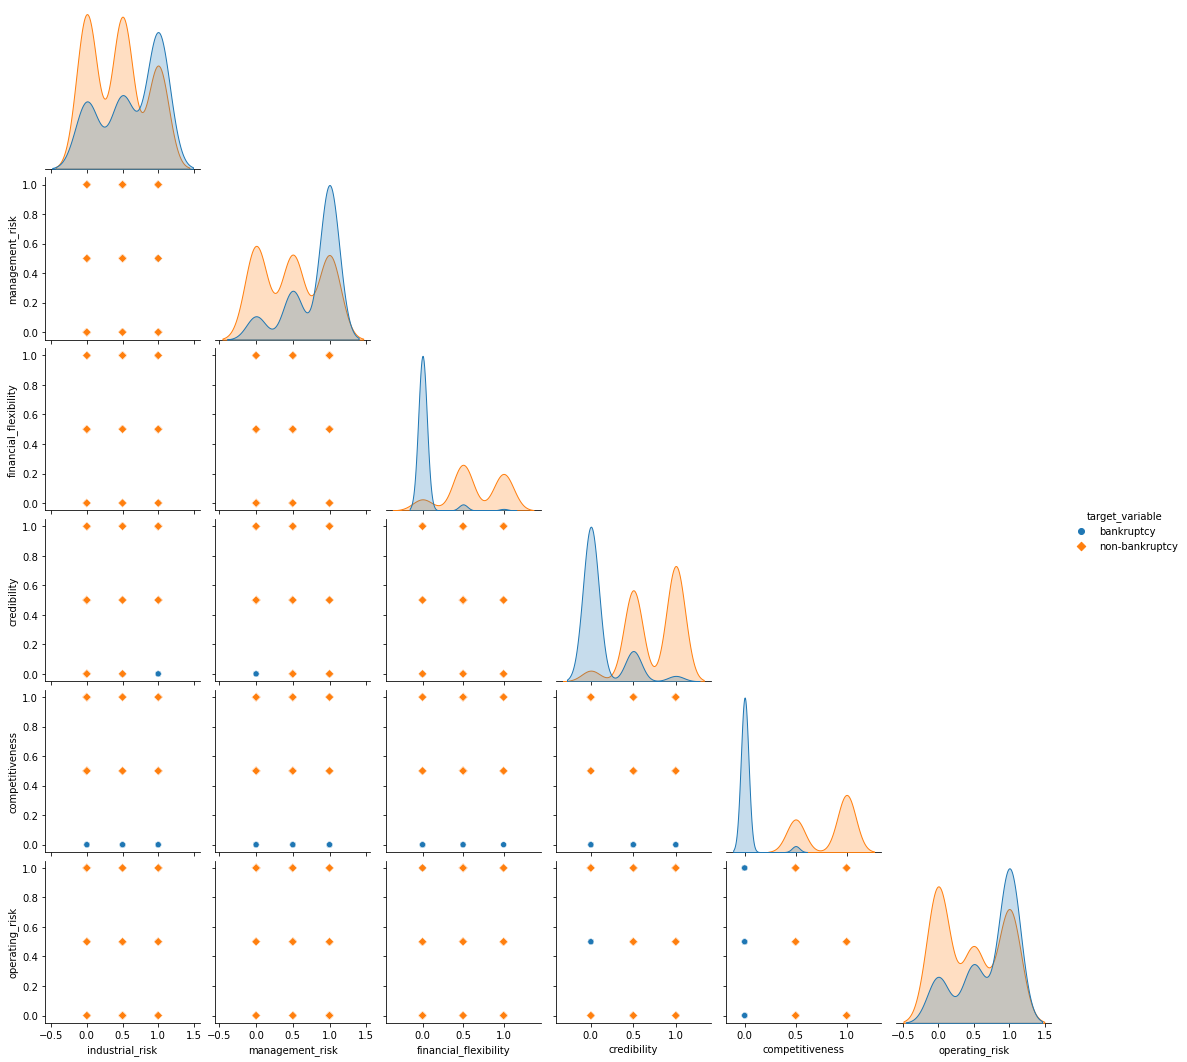

In [84]:
plt.figure(figsize=(20,50))
sn.pairplot(data = bank_final, hue = 'target_variable', markers=['o', 'D'], corner=True)

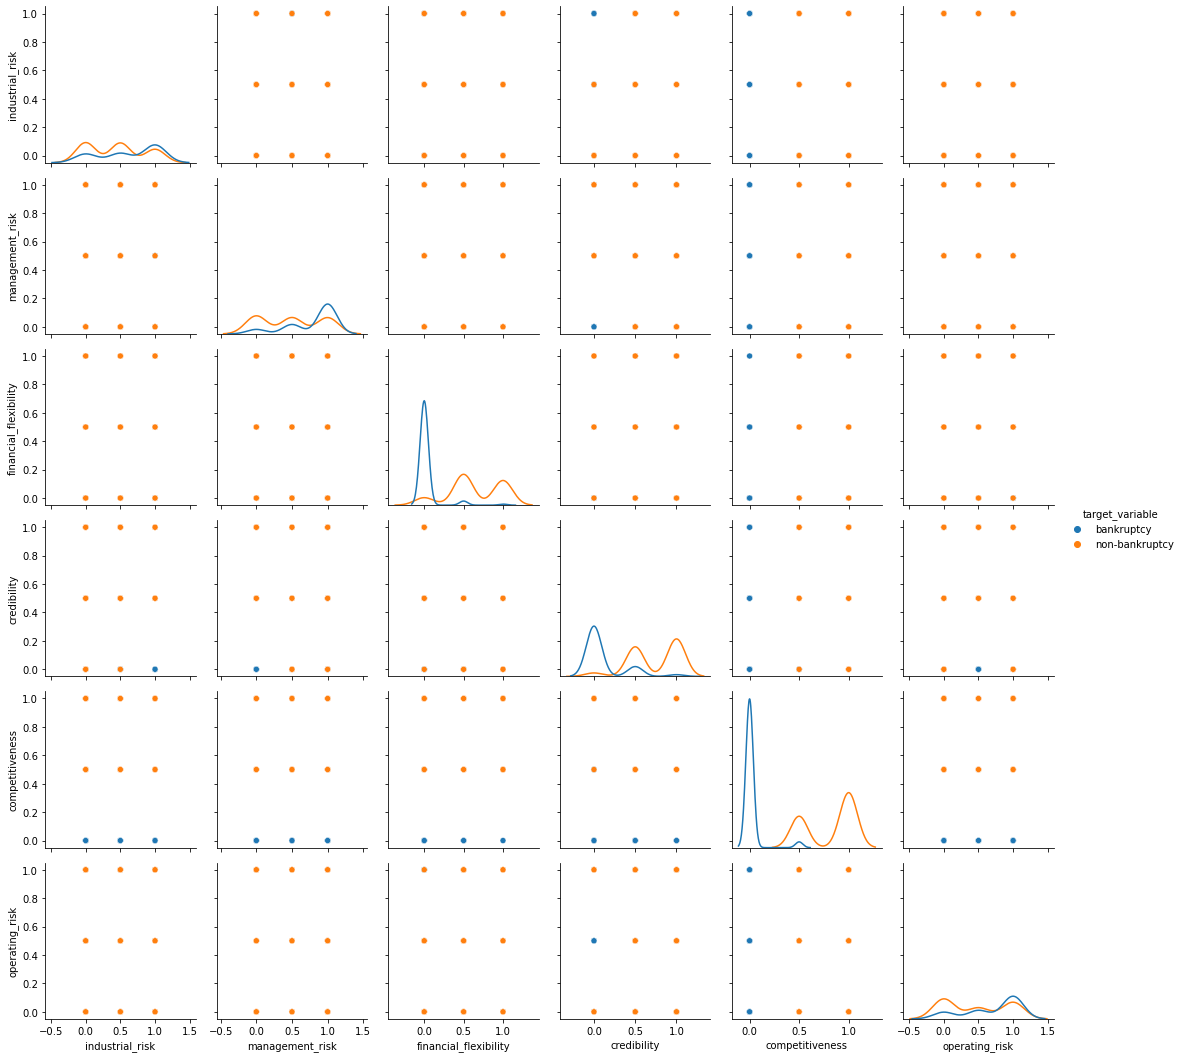

In [85]:
g = sn.PairGrid(data = bank_final, hue='target_variable')
g.map_diag(sn.kdeplot)
g.map_offdiag(sn.scatterplot)
g.add_legend()

> **🏹 NOTE:** If we take a look at the competitiveness, when it is equal to 0 regardless of other features the company going to bankrupt and also 

> **Note that** the competitiveness means the ability of company to compete with other company. if it is zero, hence company can't compete with other so it will go bankrupt

> **fun-fact 😂** if we just take the competitiveness, we can easily predict that the company will be bankrupt or not. we just don't need other variables. 😅


> **Let's take a look at it**

In [86]:
bank_final[bank_cleaned.competitiveness == 0]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
5,1.0,1.0,0.0,0.5,0.0,0.5,bankruptcy
6,1.0,1.0,0.0,0.0,0.0,0.0,bankruptcy
7,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy
8,1.0,1.0,0.0,0.5,0.0,0.0,bankruptcy
9,1.0,1.0,0.0,0.5,0.0,1.0,bankruptcy


> 🤣🤣🤣😂😂😂 **As expected** there is no need to create model now, right? 😂😁

In [87]:
bank_final[bank_final.target_variable == 'bankruptcy']

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
5,1.0,1.0,0.0,0.5,0.0,0.5,bankruptcy
6,1.0,1.0,0.0,0.0,0.0,0.0,bankruptcy
7,1.0,1.0,0.0,0.0,0.0,0.5,bankruptcy
8,1.0,1.0,0.0,0.5,0.0,0.0,bankruptcy
9,1.0,1.0,0.0,0.5,0.0,1.0,bankruptcy


> **💀 CAREFUL** In table we can see that there is a one value where competitiveness is 0.5 but still it is bankrupt. so we need to consider other variables to. But after all the competitiveness is good variable for prediction.

> **Remember** we have 102 observations and in pairplot we get only 9 because the other observations having same values will be overlapped, so we can't see those observation and that leads to wrong interpretation. **Just like Competitiveness**

**Some key observation:**

1. We have categorical variables for features and target variable. so actually looking for outliers doesn't make any sense.
2. Distribution plot will show us the count of various feature variables.
3. The most important result came from the scatter plot or pairplot regarding **Competitiveness**.
4. There are lots of duplicate values.
5. Mathematically the **largest possible size of data will be 1458 unique rows**

## Encoding categorical variables

In [88]:
from sklearn.preprocessing import LabelEncoder

In [89]:
bank_cleaned['target_variable'].unique()

array(['bankruptcy', 'non-bankruptcy'], dtype=object)

In [90]:
def encode_manually(data):
    for feature in data.columns:
        if data[feature].dtype == object:
            print(f'Encoding {feature}:')
            variables = list(data[feature].unique())
            encode_number = range(len(variables))
            encodings_dict = dict(zip(variables, encode_number))
            print(encodings_dict)
            data[feature]=data[feature].map(encodings_dict)
            return encodings_dict

In [91]:
encode_manually(bank_cleaned)

Encoding target_variable:
{'bankruptcy': 0, 'non-bankruptcy': 1}


{'bankruptcy': 0, 'non-bankruptcy': 1}

In [92]:
encode_manually(bank_final)

Encoding target_variable:
{'bankruptcy': 0, 'non-bankruptcy': 1}


{'bankruptcy': 0, 'non-bankruptcy': 1}

In [93]:
bank_final.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [94]:
bank_cleaned.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [95]:
bank_cleaned.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1
249,1.0,0.0,0.5,0.5,1.0,1.0,1


<AxesSubplot:>

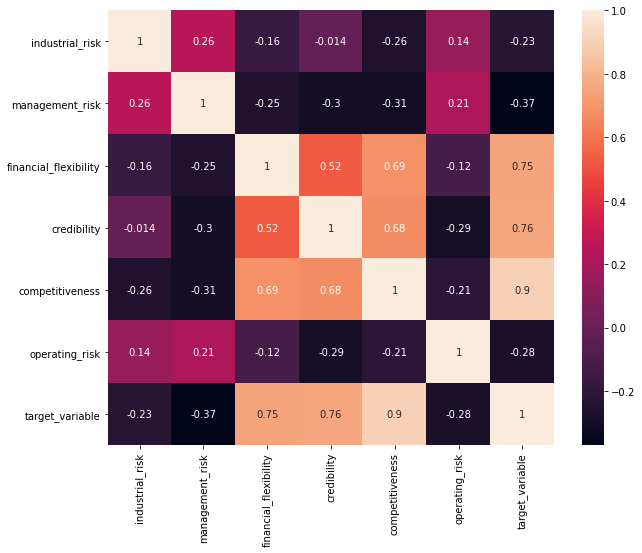

In [97]:
plt.figure(figsize=(10,8))
sn.heatmap(bank_final.corr(), annot=True)

So we get the following observation from correlation heatmap
1. The competitiveness have strong correlation with target variable as observed from scatter plot
2. The credibility, competitiveness and target_variable also have good correlation with each other

## Balancing dataset 

<AxesSubplot:ylabel='target_variable'>

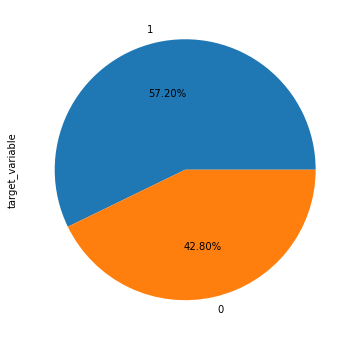

In [98]:
plt.figure(figsize= (6,6))
bank_final['target_variable'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')

> So we need to balance the dataset lets try **oversampling and undersampling**

In [99]:
X, y = bank_final.iloc[:,:-1], bank_final.iloc[:,-1]

Here we split the data into X, y so we can apply the balancing methods 

### Under Sampling (Random under sampler) for balancing the dataset

In [100]:
under_sampling = RandomUnderSampler()
X_under, y_under = under_sampling.fit_resample(X, y)

In [101]:
X_under.shape, y_under.shape, y_under.value_counts()

((214, 6),
 (214,),
 0    107
 1    107
 Name: target_variable, dtype: int64)

In [102]:
type(y_under)

pandas.core.series.Series

> **💀NOTE:🏹** The *value_count()* method is corret in upper cell, because y_under is **panda.Series not numpy array** and there is no value_counts() for numpy array. but still by procedure the y_under should be numpy array. 
so we are using np.unique(), with return_counts = True.

In [103]:
np.unique(y_under, return_counts=True)

(array([0, 1], dtype=int64), array([107, 107], dtype=int64))

<AxesSubplot:xlabel='target_variable', ylabel='count'>

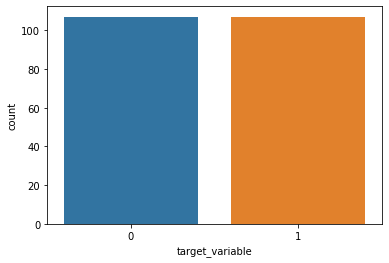

In [104]:
sn.countplot(x = y_under)

> So now we have 25-25 observations for each category of target variable. Hence it is balanced.

In [105]:
bank_undersampled = pd.DataFrame(data = X_under)
bank_undersampled.insert(6, column='target_variable', value= y_under)

In [106]:
bank_undersampled.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


### Oversampling (SMOTE method) for balancing the dataset

In [107]:
smote = SMOTE()
X_over, y_over = smote.fit_resample(X, y)

In [108]:
y_over.value_counts()

0    143
1    143
Name: target_variable, dtype: int64

<AxesSubplot:xlabel='target_variable', ylabel='count'>

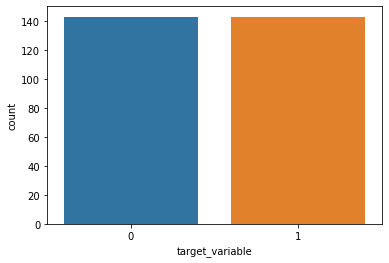

In [109]:
sn.countplot(x = y_over)

> So Here also the dataset is balance and we have 78-78 obs for each categories.

In [110]:
bank_oversampled = pd.DataFrame(data = X_over)
bank_oversampled['target_variable'] = y_over

bank_oversampled.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [111]:
bank_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        286 non-null    float64
 1   management_risk        286 non-null    float64
 2   financial_flexibility  286 non-null    float64
 3   credibility            286 non-null    float64
 4   competitiveness        286 non-null    float64
 5   operating_risk         286 non-null    float64
 6   target_variable        286 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 15.8 KB


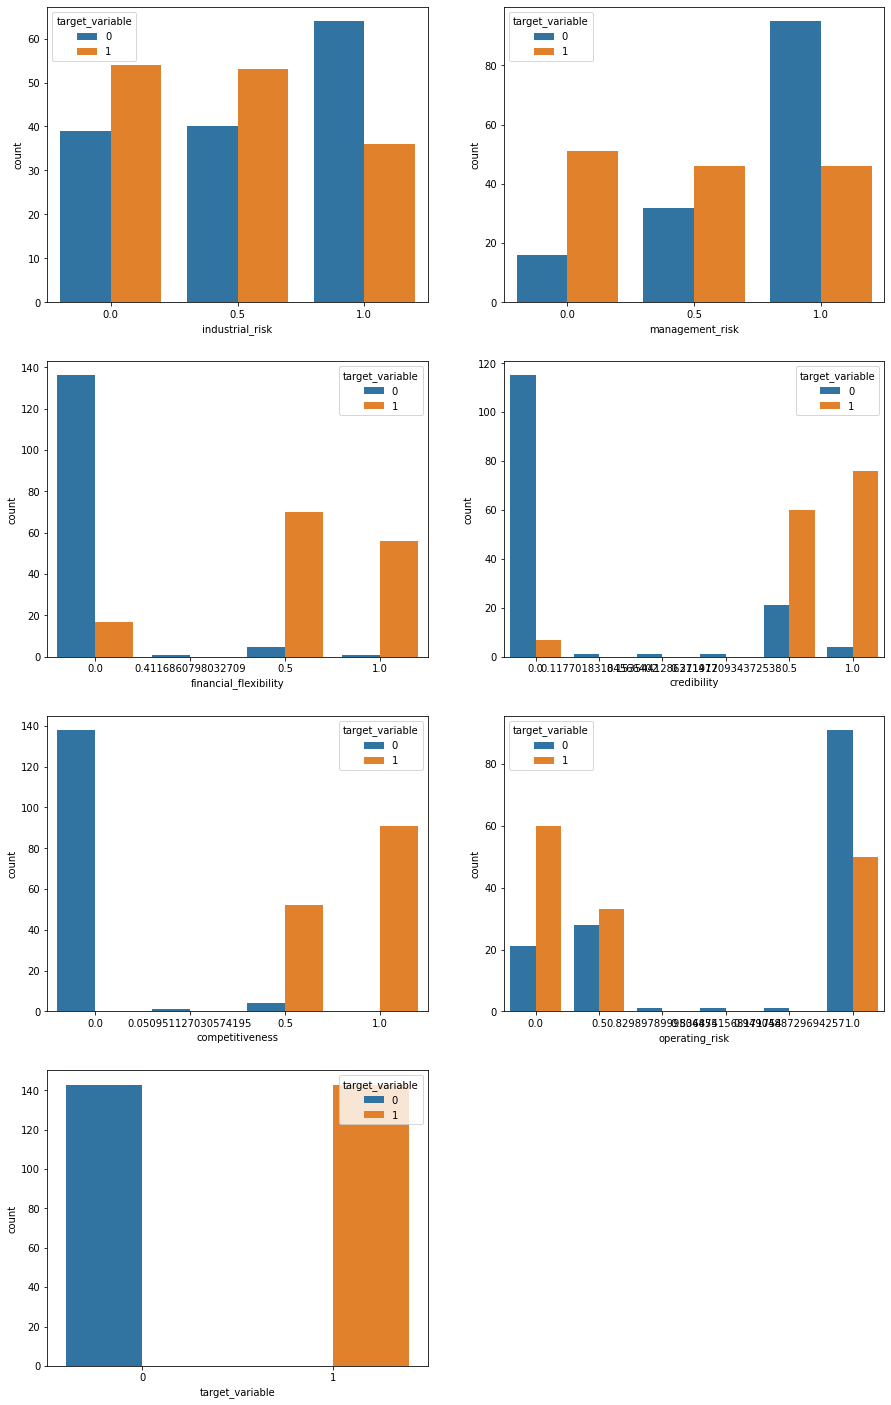

In [112]:
countplots(bank_oversampled)

> **What!!** The SMOTE() method did it's job afterall 🤣😂😂😂🤣

### Oversampling ( RandomOverSampler() ) for balancing the dataset

In [113]:
oversampler = RandomOverSampler()
X_over, y_over = oversampler.fit_resample(X, y)

In [114]:
y_over.value_counts()

0    143
1    143
Name: target_variable, dtype: int64

<AxesSubplot:xlabel='target_variable', ylabel='count'>

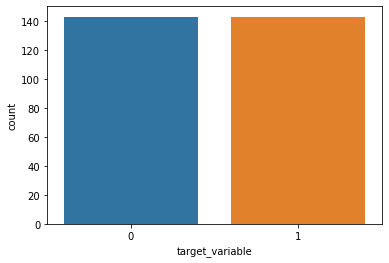

In [115]:
sn.countplot(x = y_over)

In [116]:
bank_oversampled = pd.DataFrame(data = X_over)
bank_oversampled['target_variable'] = y_over

bank_oversampled.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


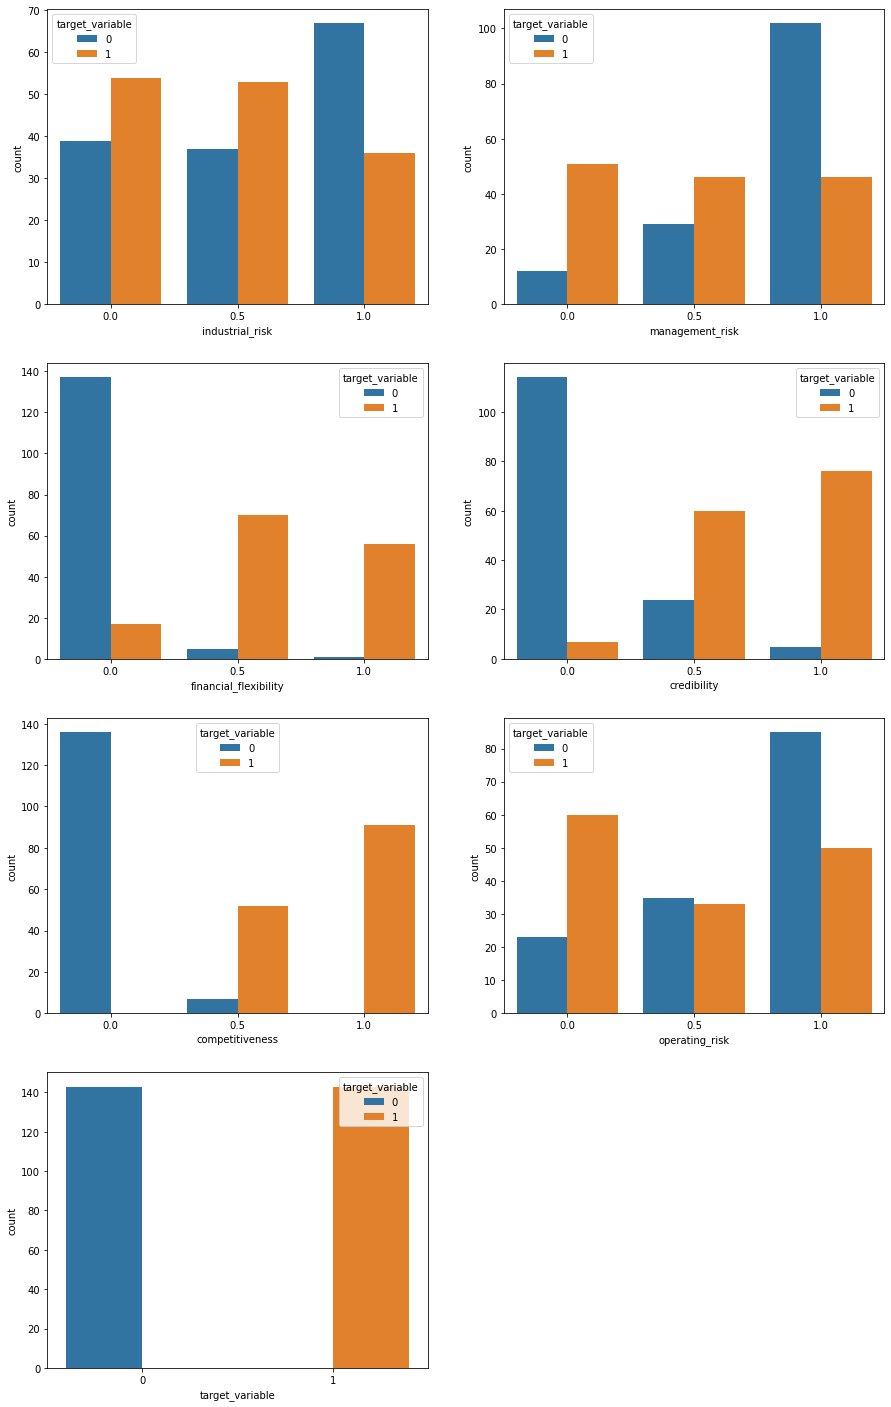

In [117]:
countplots(bank_oversampled)


---

🏹**NOTE:** The countplot tells us lots of stories related to dataset. **Each and every feature values behave according to expected and observed.**

---

In [119]:
bank_oversampled[bank_oversampled.duplicated()].head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target_variable
11,0.0,1.0,0.0,0.0,0.0,1.0,0
13,1.0,1.0,0.0,0.0,0.0,1.0,0
15,0.5,1.0,0.0,0.0,0.0,0.5,0
16,0.5,1.0,0.0,0.0,0.0,0.5,0
18,0.5,1.0,0.0,0.0,0.0,1.0,0


> **What!!!!** The values added by RandomOverSampler are duplicate values. 
**So we need to work on undersampled dataset and oversample**

## Conclusion from EDA:

So we performed variour EDA methods and try to get as much as possible from the dataset. 

- There was a serious problem with duplicate values but we removed them.

- The dataset was unbalance so we choose the **Under Sampling** and **Oversampling**. Then we decide which should be choosed.

# Creating sample dataset 

In [120]:
#grtt

# Model Selection

We have task of classification (prediction of bankruptcy).

We completed the EDA and Feature engineering on the dataset and now we can split and select the model for our job.

There are many classification models like:
1. Logistic regression
2. Decision tree.
3. Random Forest classifier.
4. ExtraRandom Forest classifier.
5. Gradient Boosting.
6. XGBoost
7. LGBoost.
8. CatBoost.
9. AdaBoost.
10. KNN
11. Naive Bayes models.
12. Support vector machine classifier.
13. Neural Network.

In [121]:
import pickle

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(bank_final.iloc[:,:-1], 
                            bank_final.iloc[:,-1], random_state= 3, 
                            test_size=0.2)

In [124]:
X_train.shape, X_test.shape

((200, 6), (50, 6))

## Neural Network 

We are using TensorFlow library, so we can create the neural network

In [125]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.optimizers import Adam

In [126]:
import tensorflow as tf

In [336]:

neural_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, kernel_regularizer = tf.keras.regularizers.L2(15)),
    tf.keras.layers.Dropout(0.2, ),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

neural_model_1.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.01),
                     loss = tf.keras.losses.BinaryCrossentropy(),
                     metrics = ['accuracy'])

# log_dir_1 = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir_1, histogram_freq=1, )


history_neural_1 = neural_model_1.fit(X_train, y_train, epochs= 30, 
                                     )  #callbacks=[tensorboard_callback]
print('Model Traning complete')

Epoch 1/30
7/7 [==============================] - 1s 2ms/step - loss: 102.5845 - accuracy: 0.2800
Epoch 2/30
7/7 [==============================] - 0s 3ms/step - loss: 73.7243 - accuracy: 0.3600
Epoch 3/30
7/7 [==============================] - 0s 2ms/step - loss: 51.4090 - accuracy: 0.4350
Epoch 4/30
7/7 [==============================] - 0s 4ms/step - loss: 34.7396 - accuracy: 0.5150
Epoch 5/30
7/7 [==============================] - 0s 3ms/step - loss: 22.7360 - accuracy: 0.5650
Epoch 6/30
7/7 [==============================] - 0s 1ms/step - loss: 14.4918 - accuracy: 0.5850
Epoch 7/30
7/7 [==============================] - 0s 2ms/step - loss: 9.0431 - accuracy: 0.5850
Epoch 8/30
7/7 [==============================] - 0s 4ms/step - loss: 5.5909 - accuracy: 0.5900
Epoch 9/30
7/7 [==============================] - 0s 3ms/step - loss: 3.4640 - accuracy: 0.5900
Epoch 10/30
7/7 [==============================] - 0s 2ms/step - loss: 2.2036 - accuracy: 0.5900
Epoch 11/30
7/7 [===============

In [337]:
neural_model_1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.7040 - accuracy: 0.5000


[0.7039743661880493, 0.5]

In [276]:
neural_model_1.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 8)                 56        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_47 (Dense)            (None, 1)                 9         
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [260]:
history_dict_neural_1 =history_neural_1.history

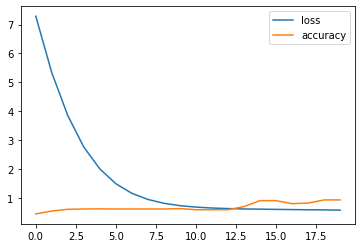

In [262]:
plt.plot(history_dict_neural_1['loss'], label = 'loss',)
plt.plot(history_dict_neural_1['accuracy'], label = 'accuracy')
plt.legend()

In [263]:
y_pred_neural_1 = tf.round(neural_model_1.predict(X_test))

In [264]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [265]:
confusion_matrix(y_test, y_pred_neural_1,)

array([[22,  3],
       [ 0, 25]], dtype=int64)

In [266]:
print(classification_report(y_test, y_pred_neural_1))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        25
           1       0.89      1.00      0.94        25

    accuracy                           0.94        50
   macro avg       0.95      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



<AxesSubplot:>

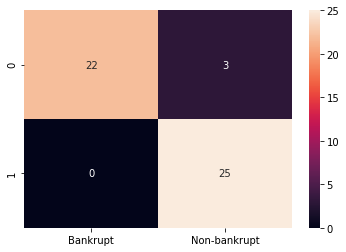

In [267]:
sn.heatmap(confusion_matrix(y_test, y_pred_neural_1), annot=True,
           xticklabels=['Bankrupt', 'Non-bankrupt'])

In [268]:
neural_model_1.layers

In [269]:
weights_1_model_1 = np.array(neural_model_1.weights[0])
weights_from_1st_layer = pd.DataFrame(weights_1_model_1)

In [270]:
weights_from_1st_layer

,0,1,2,3,4,5,6,7
0,0.005862,-0.004451,-0.007882,-0.016280,-0.003768,-0.009275,0.026375,0.006116
1,0.010031,-0.017317,-0.012505,-0.029938,-0.007133,-0.013658,0.045414,0.010806
2,-0.024208,0.037368,0.030138,0.063236,0.014923,0.027499,-0.094622,-0.025921
3,-0.020528,0.042181,0.030427,0.066960,0.015169,0.027889,-0.098796,-0.023612
4,-0.028723,0.057126,0.041351,0.084270,0.021681,0.036370,-0.135164,-0.033324
5,0.008295,-0.017762,-0.013348,-0.030240,-0.008090,-0.002565,0.044361,0.007654


In [141]:
# pickle.dump(neural_model_1, open('neural_model_pickle_file.pkl', 'wb'))

In [142]:
# neural_model_1.save('H:/Data Science/neural_1.h5', )

In [143]:
# load_model_neural = tf.keras.models.load_model('H:/Data Science/neural_1.h5')

In [145]:
# load_model_neural.evaluate(X_test, y_test)

## Logistic regression 

In [146]:
from sklearn.linear_model import LogisticRegression

In [333]:
logistic_model_1 = LogisticRegression(C = 0.001)
logistic_model_1.fit(X_train, y_train)

LogisticRegression(C=0.001)

In [334]:
logistic_model_1.score(X_test, y_test)

0.5

In [335]:
logistic_model_1.score(X_train, y_train)

0.59

In [298]:
# pickle.dump(logistic_model_1, open('logistic_model_project.pkl', 'wb'))

In [299]:
# load_model_logistic = pickle.load(open('logistic_model_project.pkl', 'rb'))

In [300]:
y_pred = logistic_model_1.predict(X_test)

In [301]:
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, plot_roc_curve

In [302]:
roc_auc_score(y_test, y_pred, )

0.5

In [303]:
roc_curve(y_test, y_pred,)

(array([0., 1.]), array([0., 1.]), array([2, 1], dtype=int64))

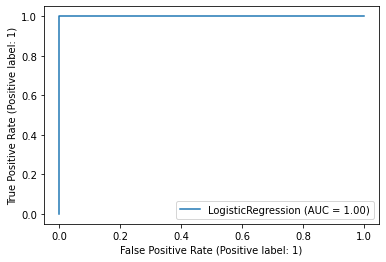

In [304]:
plot_roc_curve(logistic_model_1, X_test, y_test)